In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests as re
from tqdm import tqdm
import time

import nba_api
from nba_api.live.nba.endpoints import scoreboard
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from mar_designs import tidy_axes

In [2]:
# Variables for the notebook
facecolor = "#F7F5F2"
figsize=(11,6)
subplotFigsize=(28,6)
titlesize=16
labelsize=14

pd.set_option('display.max_columns', None)

## Look at all endpoints in nba_api.stats

In [3]:
help(nba_api.stats.endpoints)

Help on package nba_api.stats.endpoints in nba_api.stats:

NAME
    nba_api.stats.endpoints

PACKAGE CONTENTS
    _base
    alltimeleadersgrids
    assistleaders
    assisttracker
    boxscoreadvancedv2
    boxscoreadvancedv3
    boxscoredefensivev2
    boxscorefourfactorsv2
    boxscorefourfactorsv3
    boxscorehustlev2
    boxscorematchupsv3
    boxscoremiscv2
    boxscoremiscv3
    boxscoreplayertrackv2
    boxscoreplayertrackv3
    boxscorescoringv2
    boxscorescoringv3
    boxscoresummaryv2
    boxscoretraditionalv2
    boxscoretraditionalv3
    boxscoreusagev2
    boxscoreusagev3
    commonallplayers
    commonplayerinfo
    commonplayoffseries
    commonteamroster
    commonteamyears
    cumestatsplayer
    cumestatsplayergames
    cumestatsteam
    cumestatsteamgames
    defensehub
    draftboard
    draftcombinedrillresults
    draftcombinenonstationaryshooting
    draftcombineplayeranthro
    draftcombinespotshooting
    draftcombinestats
    drafthistory
    fantasywidget
 

## $\bf{All\space time\space leaders}$ endpoint

In [4]:
import nba_api.stats.endpoints.alltimeleadersgrids as atlg

In [5]:
# Request endpoint and get data into a large dictionary
allTimes = atlg.AllTimeLeadersGrids()
data = allTimes.get_dict()

In [6]:
# Print categories of leaders
allTimeDicts = data["resultSets"]
for i, d in enumerate(allTimeDicts):
    print(i, d["name"])

0 GPLeaders
1 PTSLeaders
2 ASTLeaders
3 STLLeaders
4 OREBLeaders
5 DREBLeaders
6 REBLeaders
7 BLKLeaders
8 FGMLeaders
9 FGALeaders
10 FG_PCTLeaders
11 TOVLeaders
12 FG3MLeaders
13 FG3ALeaders
14 FG3_PCTLeaders
15 PFLeaders
16 FTMLeaders
17 FTALeaders
18 FT_PCTLeaders


In [7]:
# Points scored
pointsLeadersIDs = [l[0] for l in allTimeDicts[1]["rowSet"]]

allTimeDicts[1]

{'name': 'PTSLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'PTS', 'PTS_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[2544, 'LeBron James', 41995, 1, 'Y'],
  [76003, 'Kareem Abdul-Jabbar', 38387, 2, 'N'],
  [252, 'Karl Malone', 36928, 3, 'N'],
  [977, 'Kobe Bryant', 33643, 4, 'N'],
  [893, 'Michael Jordan', 32292, 5, 'N'],
  [1717, 'Dirk Nowitzki', 31560, 6, 'N'],
  [76375, 'Wilt Chamberlain', 31419, 7, 'N'],
  [201142, 'Kevin Durant', 30537, 8, 'Y'],
  [406, "Shaquille O'Neal", 28596, 9, 'N'],
  [2546, 'Carmelo Anthony', 28289, 10, 'N']]}

In [8]:
# Assists made
assistsLeadersIDs = [l[0] for l in allTimeDicts[2]["rowSet"]]

allTimeDicts[2]

{'name': 'ASTLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'AST', 'AST_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[304, 'John Stockton', 15806, 1, 'N'],
  [101108, 'Chris Paul', 12444, 2, 'Y'],
  [467, 'Jason Kidd', 12091, 3, 'N'],
  [2544, 'LeBron James', 11534, 4, 'Y'],
  [959, 'Steve Nash', 10335, 5, 'N'],
  [349, 'Mark Jackson', 10334, 6, 'N'],
  [77142, 'Magic Johnson', 10141, 7, 'N'],
  [600015, 'Oscar Robertson', 9887, 8, 'N'],
  [201566, 'Russell Westbrook', 9885, 9, 'Y'],
  [78318, 'Isiah Thomas', 9061, 10, 'N']]}

In [9]:
# Merge lists and remove duplicates
leaderIDs = list(set(assistsLeadersIDs + pointsLeadersIDs))

In [10]:
# Rebound leaders
allTimeDicts[6]

{'name': 'REBLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'REB', 'REB_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[76375, 'Wilt Chamberlain', 23924, 1, 'N'],
  [78049, 'Bill Russell', 21620, 2, 'N'],
  [76003, 'Kareem Abdul-Jabbar', 17440, 3, 'N'],
  [76979, 'Elvin Hayes', 16279, 4, 'N'],
  [77449, 'Moses Malone', 16212, 5, 'N'],
  [1495, 'Tim Duncan', 15091, 6, 'N'],
  [252, 'Karl Malone', 14968, 7, 'N'],
  [305, 'Robert Parish', 14715, 8, 'N'],
  [708, 'Kevin Garnett', 14662, 9, 'N'],
  [2730, 'Dwight Howard', 14627, 10, 'N']]}

In [11]:
# Field goals made leaders
allTimeDicts[8]

{'name': 'FGMLeaders',
 'headers': ['PLAYER_ID', 'PLAYER_NAME', 'FGM', 'FGM_RANK', 'IS_ACTIVE_FLAG'],
 'rowSet': [[76003, 'Kareem Abdul-Jabbar', 15837, 1, 'N'],
  [2544, 'LeBron James', 15420, 2, 'Y'],
  [252, 'Karl Malone', 13528, 3, 'N'],
  [76375, 'Wilt Chamberlain', 12681, 4, 'N'],
  [893, 'Michael Jordan', 12192, 5, 'N'],
  [977, 'Kobe Bryant', 11719, 6, 'N'],
  [406, "Shaquille O'Neal", 11330, 7, 'N'],
  [1717, 'Dirk Nowitzki', 11169, 8, 'N'],
  [76979, 'Elvin Hayes', 10976, 9, 'N'],
  [165, 'Hakeem Olajuwon', 10749, 10, 'N']]}

## Use $\bf{common\space all\space players}$ endpoint to get IDs of all active players

In [12]:
from nba_api.stats.endpoints import commonallplayers as cap

In [13]:
allPlayers = cap.CommonAllPlayers()
data = allPlayers.get_dict()

In [14]:
activePlayerIDs = []
allPlayers = data["resultSets"][0]
for i, playerRow in enumerate(allPlayers["rowSet"]):
    
    # Check that they're active
    if playerRow[5] == "2024":
        # print(i, playerRow)
        activePlayerIDs.append(playerRow[0])

In [15]:
# Remove players IDs from activePlayerIDs if they're in leadersIDs
activePlayerIDs2 = list(set(activePlayerIDs) - set(leaderIDs))
len(leaderIDs)

19

## Now that I have two lists: `activePlayerIDs2` and  `leaderIDs`, I can see if there are groupings based on points versus assists using $\bf{player\space career\space stats}$ endpoint.

In [16]:
# Get minutes, points, assists of all in the leadersIDs list
minutesPointsAssistsLeaders = []
for i, ID in enumerate(leaderIDs):
    career = playercareerstats.PlayerCareerStats(player_id=ID) 
    careerDF = career.get_data_frames()[0]
    minutesPointsAssistsLeaders.append(careerDF[["MIN", "PTS", "AST"]].sum().to_numpy())
    time.sleep(10)
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [17]:
ID

893

In [18]:
# Get minutes, points, assists of all active players not in the leadersIDs list
allPlayersSimple = players.get_players()

for i, ID in enumerate(activePlayerIDs):
    career = playercareerstats.PlayerCareerStats(player_id=ID) 
    dfCareer = career.get_data_frames()[0]
    
    # Get name of player with ID. If list is empty, pass and move on. 
    listName = [row["full_name"] for row in allPlayersSimple if row["id"] == ID]
    if listName:
        name = listName[0].replace(" ", "_")
        dfCareer.to_csv(f"../data/playerCareerStats/{name}.csv")
        
    time.sleep(5)



In [19]:
# Get points and assists from top 10% of non leaders
minutes = [sublist[0] for sublist in minutesPointsAssists]
threshold = np.percentile(minutes, 95)

fig, ax = plt.subplots()
ax.hist(minutes)
ax.axvline(threshold, color="k", label="90th Percentile")
ax.legend(loc="best")
tidy_axes(ax)

ax.set_xlabel("Minutes Played in Career", fontsize=14)
ax.set_title("All Active Players Not in Top 10 Points or Assists", fontsize=16)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/minutes_played_all_players.png")

NameError: name 'minutesPointsAssists' is not defined

In [ ]:


top10 = np.array([sublist for sublist in minutesPointsAssists if sublist[0] > threshold])
leaders = np.array(minutesPointsAssistsLeaders)
fig, ax = plt.subplots()

ax.scatter(top10[:,1], top10[:,2], label="Non-Leader")
ax.scatter(leaders[:,1], leaders[:,2], label="Leader")
tidy_axes(ax)

ax.set_xlabel("Points", fontsize=labelsize)
ax.set_ylabel("Assists", fontsize=labelsize)
ax.set_title("Leaders vs. Non Leaders. Not too big of a gap.", fontsize=titlesize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/pts_asts_scatter.png")
plt.show()

In [ ]:
pointsArray = np.concatenate((top10[:,1], leaders[:,1]))
assistsArray = np.concatenate((top10[:,2], leaders[:,2]))

ptsAsts = pd.DataFrame(np.array([pointsArray, assistsArray]).T, columns=["Points", "Assists"])

# Normalize it
scaler = StandardScaler()
ptsAsts = pd.DataFrame(scaler.fit_transform(ptsAsts), columns=ptsAsts.columns)


In [ ]:
fig, ax = plt.subplots()


kmeans = KMeans(n_clusters=2)
kmeans.fit(ptsAsts)

ax.scatter(ptsAsts["Points"], ptsAsts["Assists"], c=kmeans.labels_)

tidy_axes(ax)
ax.set_title("KMeans Clustering of Assists vs. Points", fontsize=titlesize)
ax.set_xlabel("Points", fontsize=14)
ax.set_ylabel("Assists", fontsize=14)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
plt.savefig("../images/kmeans.png")
plt.show()

In [ ]:
# Today's Score Board
games = scoreboard.ScoreBoard()

# json
games.get_json()

# dictionary
gameDict = games.get_dict()

In [ ]:
listOfCurrentGames = gameDict["scoreboard"]["games"] # this is a list of dictionaries. each dictionary represents a different game for a given day.

In [155]:
# Nikola Jokić
career = playercareerstats.PlayerCareerStats(player_id='203999') 


# dictionary
jk = career.get_data_frames()[0]
# jk.to_csv("../data/jk_stats.csv")
jk.tail()

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

In [150]:
# Get all players
all_players = players.get_players()

# Find Russell Westbrook
westbrook = [player for player in all_players if player['full_name'] == "Russell Westbrook"]

# Display his ID
print(westbrook)



[{'id': 201566, 'full_name': 'Russell Westbrook', 'first_name': 'Russell', 'last_name': 'Westbrook', 'is_active': True}]


['Russell Westbrook']

In [135]:
career = playercareerstats.PlayerCareerStats(player_id="201566")
wb = career.get_data_frames()[0]
wb.tail()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
14,201566,2022-23,00,1610612747,LAL,34.0,52,3,1491.0,304,729,0.417,63,213,0.296,156,238,0.655,59,262,321,391,53,23,184,121,827
15,201566,2022-23,00,1610612746,LAC,34.0,21,21,635.0,128,262,0.489,26,73,0.356,50,76,0.658,30,72,102,160,23,10,71,41,332
16,201566,2022-23,00,0,TOT,34.0,73,24,2126.0,432,991,0.436,89,286,0.311,206,314,0.656,89,334,423,551,76,33,255,162,1159
17,201566,2023-24,00,1610612746,LAC,35.0,68,11,1529.0,301,663,0.454,42,154,0.273,110,160,0.688,93,250,343,306,74,23,144,121,754
18,201566,2024-25,00,1610612743,DEN,36.0,48,27,1328.0,235,493,0.477,55,166,0.331,98,153,0.641,66,179,245,307,72,24,146,121,623


In [45]:
# Fix the TOT in TEAM_ABBREVIATION to LAC
wb.loc[16, "TEAM_ABBREVIATION"] = "LAC"
wb = wb[["SEASON_ID", "TEAM_ABBREVIATION", "MIN", "PTS", "REB", "AST"]]

# NEED TO FIX THE TOT COLUMN! THIS REPRESENTS THE TOTAL OF LAC AND LAL FOR THE ENTIRE SEASON
wb.tail()

,SEASON_ID,TEAM_ABBREVIATION,MIN,PTS,REB,AST
14,2022-23,LAL,1491.0,827,321,391
15,2022-23,LAC,635.0,332,102,160
16,2022-23,LAC,2126.0,1159,423,551
17,2023-24,LAC,1529.0,754,343,306
18,2024-25,DEN,1328.0,623,245,307


In [ ]:
wb.to_csv("../data/wb_stats.csv")

## Triple double defined as 10 or more in each of these categories: PTS, REB, AST

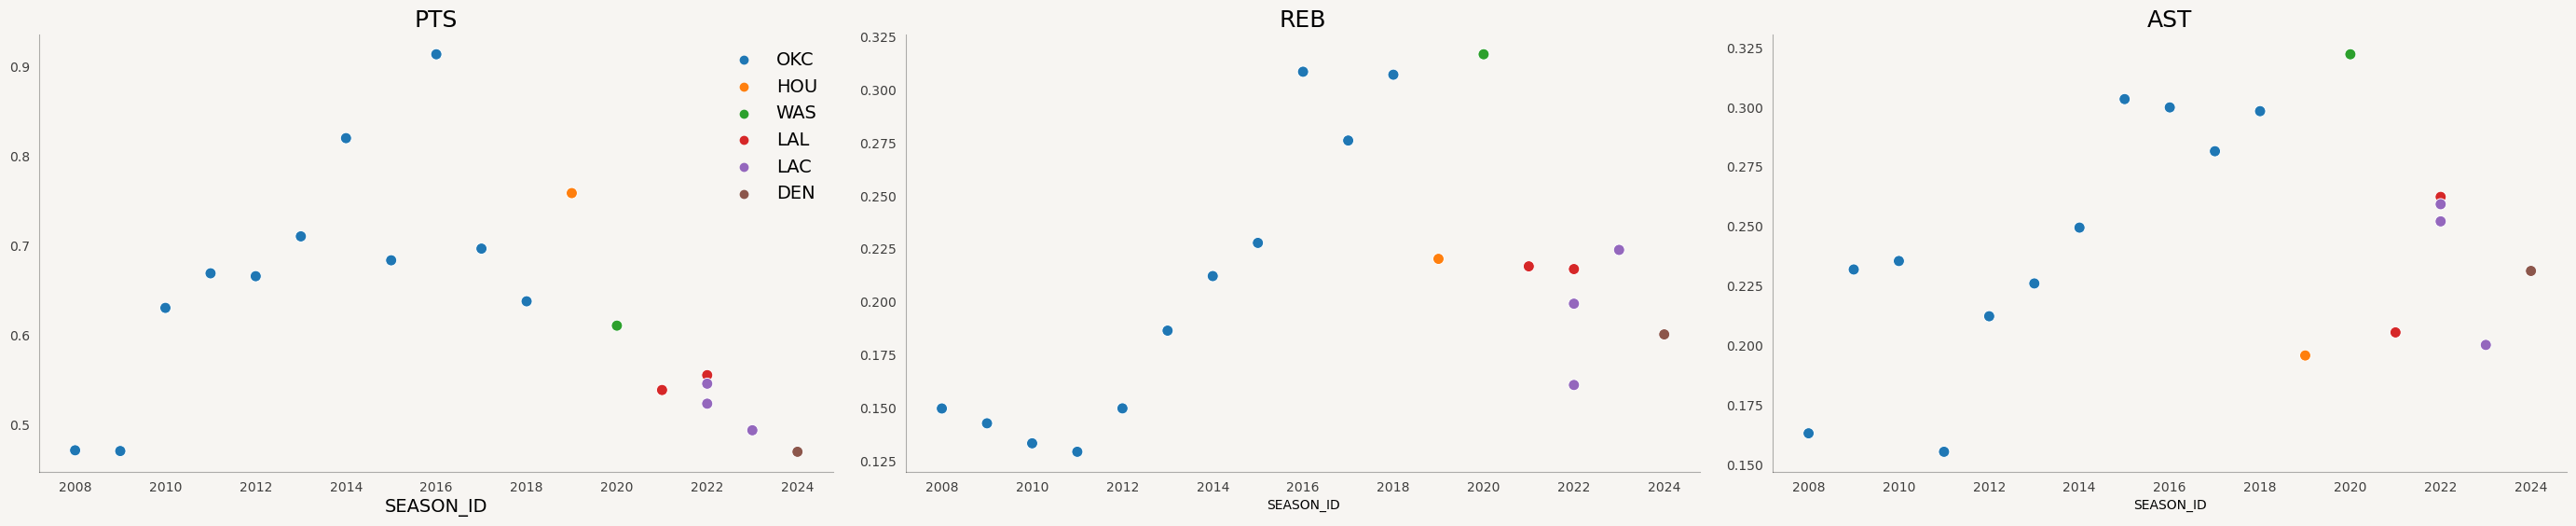

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=subplotFigsize)
fig.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)
ax2.set_facecolor(facecolor)
ax3.set_facecolor(facecolor)
tidy_axes(ax1)
tidy_axes(ax2)
tidy_axes(ax3)


years = wb["SEASON_ID"].apply(lambda year: int(year[0:4]))

pointsPerMinute = wb["PTS"]/wb["MIN"]
reboundsPerMinute = wb["REB"]/wb["MIN"]
assistsPerMinute = wb["AST"]/wb["MIN"]

sns.scatterplot(x=years, y=pointsPerMinute, hue=wb["TEAM_ABBREVIATION"], s=74, ax=ax1)
sns.scatterplot(x=years, y=reboundsPerMinute, hue=wb["TEAM_ABBREVIATION"], s=74, ax=ax2)
sns.scatterplot(x=years, y=assistsPerMinute, hue=wb["TEAM_ABBREVIATION"], s=74, ax=ax3)
ax1.set_title("PTS", fontsize=18)
ax2.set_title("REB", fontsize=18)
ax3.set_title("AST", fontsize=18)

ax1.legend(frameon=False, fontsize=14)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

ax1.set_xlabel("SEASON_ID", fontsize=14)
plt.tight_layout(pad=2)

plt.savefig("../images/wb_stats_per_minute.png")

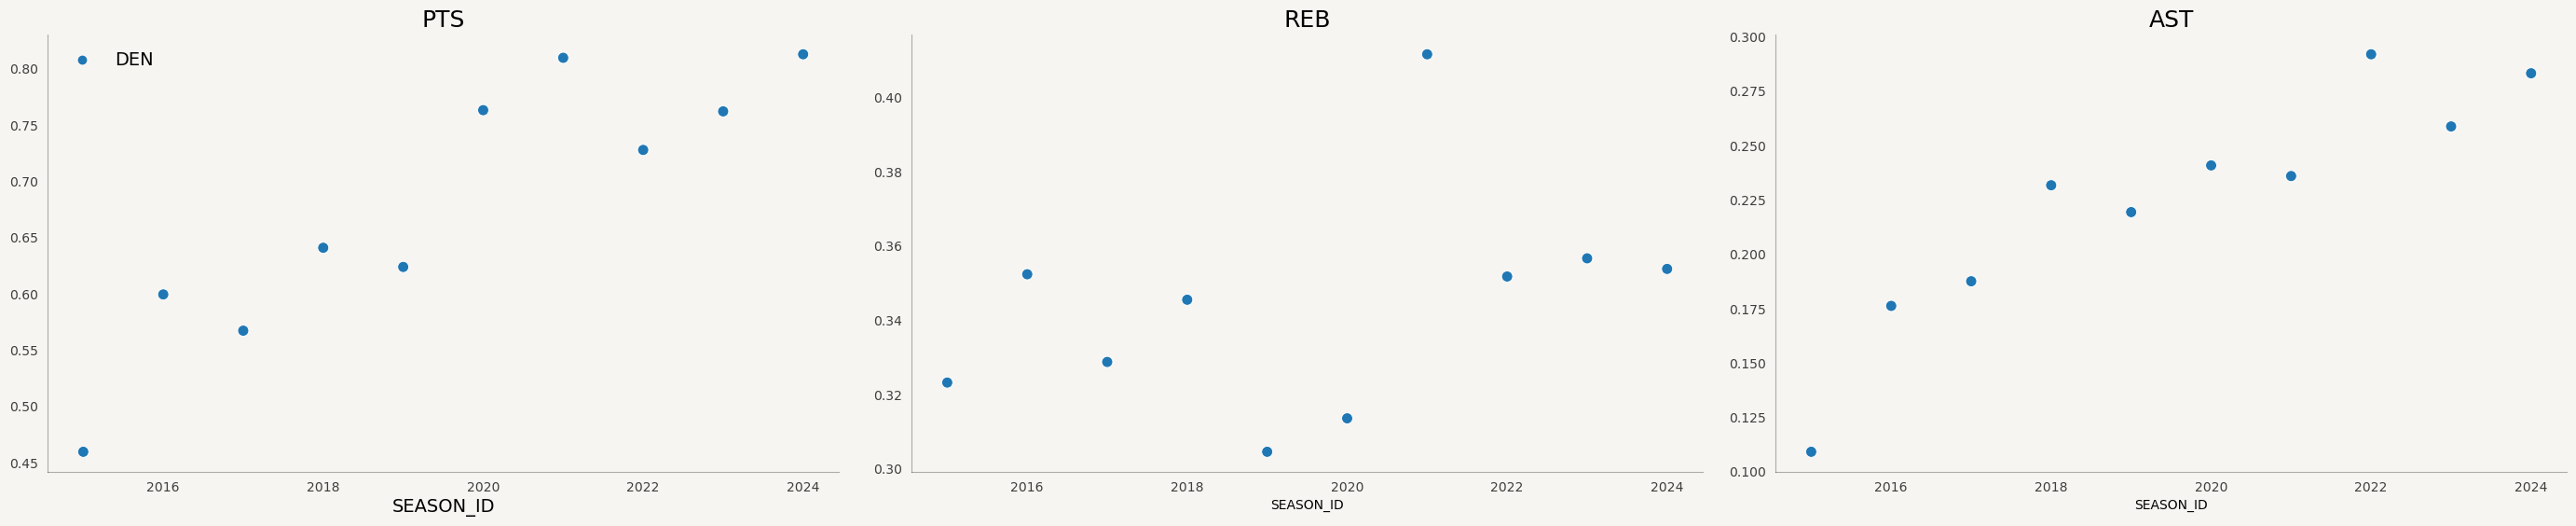

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=subplotFigsize)
fig.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)
ax2.set_facecolor(facecolor)
ax3.set_facecolor(facecolor)
tidy_axes(ax1)
tidy_axes(ax2)
tidy_axes(ax3)


years = jk["SEASON_ID"].apply(lambda year: int(year[0:4]))

pointsPerMinute = jk["PTS"]/jk["MIN"]
reboundsPerMinute = jk["REB"]/jk["MIN"]
assistsPerMinute = jk["AST"]/jk["MIN"]

sns.scatterplot(x=years, y=pointsPerMinute, hue=jk["TEAM_ABBREVIATION"], s=74, ax=ax1)
sns.scatterplot(x=years, y=reboundsPerMinute, hue=jk["TEAM_ABBREVIATION"], s=74, ax=ax2)
sns.scatterplot(x=years, y=assistsPerMinute, hue=jk["TEAM_ABBREVIATION"], s=74, ax=ax3)
ax1.set_title("PTS", fontsize=18)
ax2.set_title("REB", fontsize=18)
ax3.set_title("AST", fontsize=18)

ax1.legend(frameon=False, fontsize=14)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

ax1.set_xlabel("SEASON_ID", fontsize=14)
plt.tight_layout(pad=2)
plt.savefig("../images/jk_stats_per_minute.png")

### Now look at news API

In [116]:
# Get my API key --- get your own plz!
with open("../../key_for_newsAPI.txt") as f:
    key = f.readlines()[0].strip()

In [117]:
endpoint = "https://newsapi.org/v2/everything"
query = "Russell Westbrook"
language = "en"

url = f"{endpoint}/?q={query}&language={language}&apiKey={key}"
wbNews = re.get(url)
wbNews

<Response [200]>

In [118]:
# Look at possible keys on articles
wbNews.json()["articles"][0].keys()

dict_keys(['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])

In [119]:
grandList = []
for article in wbNews.json()["articles"]:
    grandList.append([article["source"], article["title"], article["description"], article["publishedAt"]])

df = pd.DataFrame(grandList, columns=["Source", "Title", "Description", "Published At"])
df.to_csv("WestbrookNews.csv")
df.head()

,Source,Title,Description,Published At
0,"{'id': 'espn', 'name': 'ESPN'}",Nuggets snap skid but see Westbrook exit early,Nuggets guard Russell Westbrook left Friday ni...,2025-02-01T04:21:47Z
1,"{'id': 'espn', 'name': 'ESPN'}","Jokic, Russ make NBA history with triple-doubles",Denver's Nikola Jokic and Russell Westbrook ma...,2025-01-11T06:13:31Z
2,"{'id': 'bleacher-report', 'name': 'Bleacher Re...",The 5 Most Overrated Trade Targets Ahead of 20...,The 2024-25 campaign could provide us with one...,2025-01-11T12:00:00Z
3,"{'id': None, 'name': 'BBC News'}",Young's buzzer-beater seals win for Atlanta Hawks,Trae Young scores a dramatic buzzer-beater to ...,2025-01-08T07:55:17Z
4,"{'id': 'bleacher-report', 'name': 'Bleacher Re...","Broncos' 2025 Free Agents, Targets and Draft N...","From a big-picture perspective, the Denver Bro...",2025-01-12T21:07:31Z


In [120]:
# Will need to get more data and filter for LA years
df.info()
df.to_csv("../data/wb_news.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        100 non-null    object
 1   Title         100 non-null    object
 2   Description   100 non-null    object
 3   Published At  100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


## GO back to basketball stats -- checkout LeBron

In [121]:
# Get all players
all_players = players.get_players()

# Find Russell Westbrook
james = [player for player in all_players if player['full_name'] == "LeBron James"]

# Display his ID
print(james)

[{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True}]


In [23]:
totalPointsPerYearsInLeague = []
totalAssistsPerYearsInLeague = []
totalReboundsPerYearsInLeague = []
all_IDs = {d["id"]:d["full_name"] for d in all_players if d["is_active"] == True}

for player_ID in tqdm(all_IDs.keys()):
    career = playercareerstats.PlayerCareerStats(player_id=player_ID)
    careerDF = career.get_data_frames()[0]
    
    totalPoints = careerDF["PTS"].sum()
    totalAssists = careerDF["AST"].sum()
    totalRebounds = careerDF["REB"].sum()
    
    totalYears = len(careerDF["SEASON_ID"].unique())
    
    if totalYears>0:
        totalPointsPerYearsInLeague.append(totalPoints/totalYears)
        totalAssistsPerYearsInLeague.append(totalAssists/totalYears)
        totalReboundsPerYearsInLeague.append(totalRebounds/totalYears)
        
    time.sleep(1)


100%|██████████| 544/544 [12:05<00:00,  1.33s/it]


In [34]:
wbRatio = wb["PTS"].sum()/len(wb["SEASON_ID"].unique())
ykRatio = jk["PTS"].sum()/len(jk["SEASON_ID"].unique())

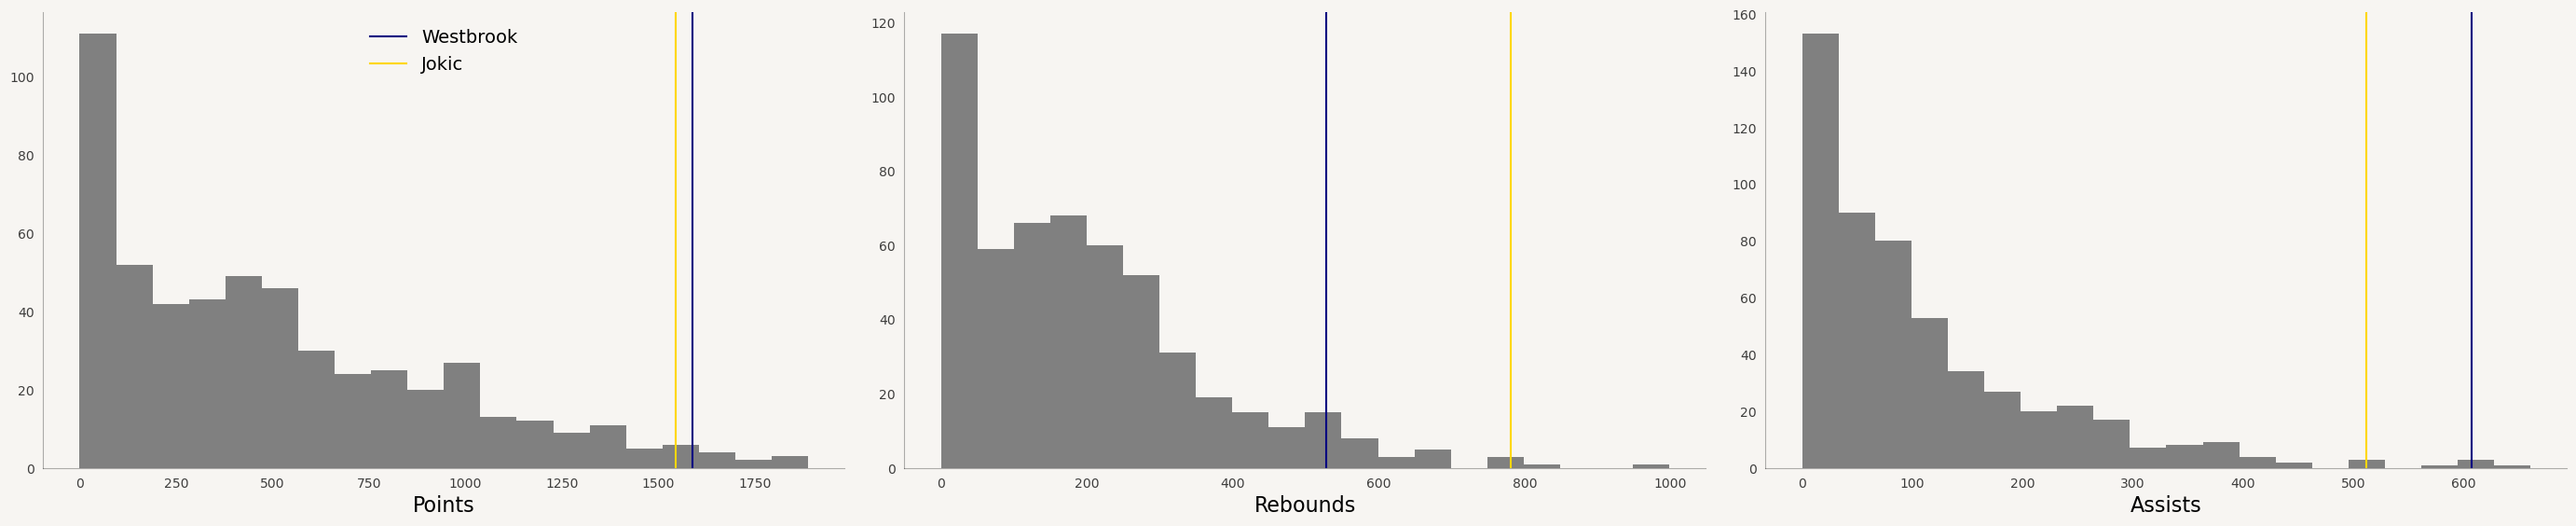

In [104]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=subplotFigsize)
fig.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)
ax2.set_facecolor(facecolor)
ax3.set_facecolor(facecolor)

tidy_axes(ax1)
tidy_axes(ax2)
tidy_axes(ax3)

ax1.hist(totalPointsPerYearsInLeague, color="grey", bins=20)
wbRatio = wb["PTS"].sum()/len(wb["SEASON_ID"].unique())
ykRatio = jk["PTS"].sum()/len(jk["SEASON_ID"].unique())
ax1.axvline([wbRatio], label="Westbrook", c="navy")
ax1.axvline([ykRatio], label="Jokic", c="gold")

ax2.hist(totalReboundsPerYearsInLeague, color="grey", bins=20)
wbRatio = wb["REB"].sum()/len(wb["SEASON_ID"].unique())
ykRatio = jk["REB"].sum()/len(jk["SEASON_ID"].unique())
ax2.axvline([wbRatio], label="Westbrook", c="navy")
ax2.axvline([ykRatio], label="Jokic", c="gold")


ax3.hist(totalAssistsPerYearsInLeague, color="grey", bins=20)
wbRatio = wb["AST"].sum()/len(wb["SEASON_ID"].unique())
ykRatio = jk["AST"].sum()/len(jk["SEASON_ID"].unique())
ax3.axvline([wbRatio], label="Westbrook", c="navy")
ax3.axvline([ykRatio], label="Jokic", c="gold")

# ax.axvline([wbRatio], label="Westbrook", c="navy")
# ax.axvline([ykRatio], label="Jokic", c="gold")

ax1.set_xlabel("Points", fontsize=16)
ax2.set_xlabel("Rebounds", fontsize=16)
ax3.set_xlabel("Assists", fontsize=16)

ax1.legend(frameon=False, fontsize=14)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)

plt.tight_layout(pad=2)
plt.savefig("../images/stats_in_population.png")

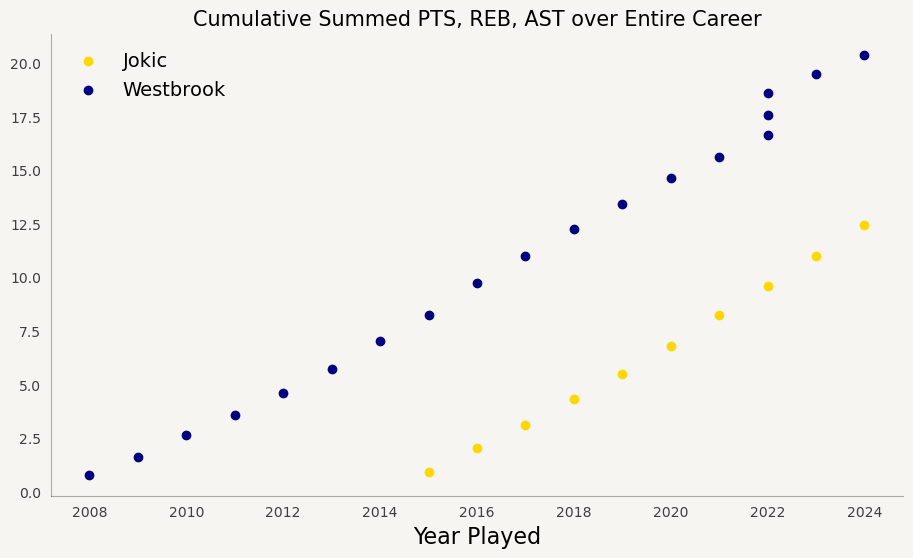

In [138]:
fig, ax = plt.subplots(figsize=figsize)
fig.set_facecolor(facecolor)
ax.set_facecolor(facecolor)
# Extract the starting year of each season
years_jk = jk["SEASON_ID"].apply(lambda year: int(year[:4]))
years_wb = wb["SEASON_ID"].apply(lambda year: int(year[:4]))

# Compute the cumulative sum of contributions per minute
jk_cumsum = (jk["PTS"]/jk["MIN"] + jk["AST"]/jk["MIN"] + jk["REB"]/jk["MIN"]).cumsum()
wb_cumsum = (wb["PTS"]/wb["MIN"] + wb["AST"]/wb["MIN"] + wb["REB"]/wb["MIN"]).cumsum()

# Scatter plot
ax.scatter(years_jk, jk_cumsum, label="Jokic", c="gold")
ax.scatter(years_wb, wb_cumsum, label="Westbrook", c="navy")
ax.set_xlabel("Year Played", fontsize=16)
ax.set_title("Cumulative Summed PTS, REB, AST over Entire Career", fontsize=15)
tidy_axes(ax)
plt.savefig("../images/cumulative_stats.png")

In [133]:
years_wb

0     2008
1     2009
2     2010
3     2011
4     2012
5     2013
6     2014
7     2015
8     2016
9     2017
10    2018
11    2019
12    2020
13    2021
14    2022
15    2022
16    2022
17    2023
18    2024
Name: SEASON_ID, dtype: int64